# Loan Application Status Prediction

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [30]:
#Importing the dataset
df1=pd.read_csv("loan_prediction.csv")

In [31]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
#Checking the shape pf the dataset
df1.shape

(614, 13)

There are 614 rows and 13 columns

In [33]:
#Checking the null vales present in the dataset.
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in Gender, Married,Dependents, Self_employed,Loan Amount, Loan_Amount_Term,Credit History has null values present.

In [34]:
#Checking the correlation 
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

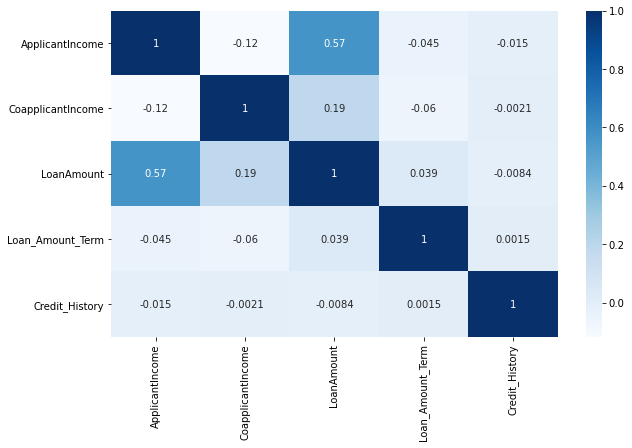

In [35]:
#Correlation via Heatmap
plt.figure(figsize=[10,6])
sns.heatmap(df1.corr(),cmap="Blues", annot=True)

Here we cannot observe the correlation with the target column  as the target column as string datatype.
So we will do further EDA in order to check the relation between dependent column and independent column.

In [36]:
#Dropping the unnessary column
df1.drop("Loan_ID",axis=1,inplace=True)

In [37]:
#Creating a list of the columns having missing values
missing_values_cat=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]

In [38]:
#filling it with the most frequent values
for i in missing_values_cat:
    df1[i].fillna(df1[i].mode()[0], inplace=True)

In [39]:
#filling it with mean of the values present in the LoanAmount column
df1["LoanAmount"].fillna(df1["LoanAmount"].mean(), inplace=True)

Y    422
N    192
Name: Loan_Status, dtype: int64


Text(0.5, 1.0, 'Loan approval count')

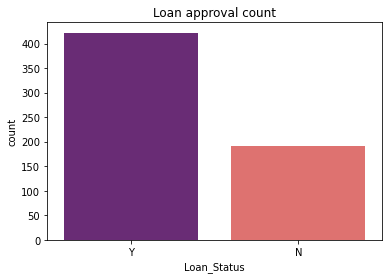

In [40]:
#Checking the distribution of the values Y and N in the target column'
print(df1["Loan_Status"].value_counts())
sns.countplot(x='Loan_Status',data = df1,palette="magma")
plt.title("Loan approval count")

We can cleary observe that more than 50% of the velues are with Y.
Hence we have to balance it as well before training the ML model on the Dataset.

<AxesSubplot:xlabel='Gender', ylabel='count'>

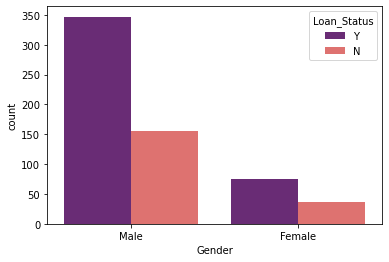

In [41]:
#Checking the relation b/w gender and Loan Status
sns.countplot(x='Gender',data = df1,hue="Loan_Status",palette="magma")

We can observe that majority of the Males who applied for Loans got the Loan but if we see in case of Female almost 50% of the females are didn't received the loan facility.

<AxesSubplot:xlabel='Education', ylabel='count'>

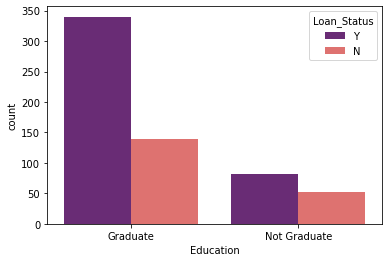

In [42]:
#Checking the relation b/w education and Loan Status
sns.countplot(x='Education',data = df1,hue="Loan_Status",palette="magma")

It clearly observable that people who are more educated i.e are graduated are getting the loan facility as comapred to not graduated.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

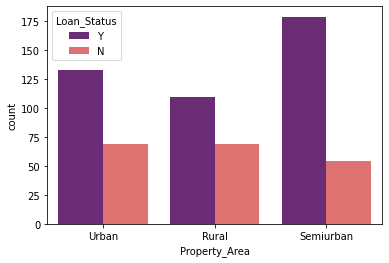

In [43]:
#Checking the relation b/w Property_Area and Loan Status
sns.countplot(x='Property_Area',data = df1,hue="Loan_Status",palette="magma")

We can observe that density of Semiurban peoples are more in getting the Loans.
The least is rural area where majority of the peoples are not getting the loan facility,

<AxesSubplot:xlabel='Married', ylabel='count'>

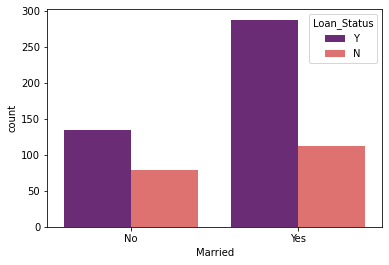

In [44]:
#Checking the relation b/w Married and Loan Status
sns.countplot(x='Married',data = df1,hue="Loan_Status",palette="magma")

It is clearly observable that most of the people are getting the Loan facility as comapared to the singles with high difference.

In [45]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [46]:
#Creating a list of columns having continous values
dist_col=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

Skewness present in column ApplicantIncome is :  6.523526250899361


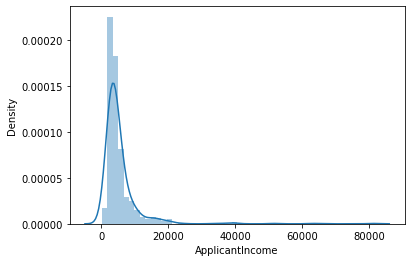

Skewness present in column CoapplicantIncome is :  7.473216996340462


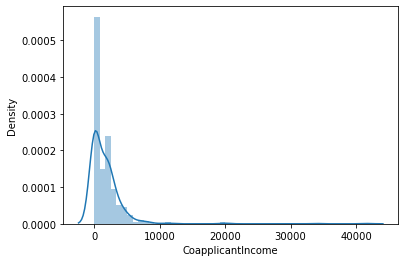

Skewness present in column LoanAmount is :  2.719935540956202


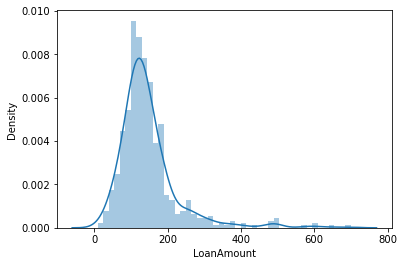

In [52]:
#Checking the skewness in the above mentioned columns
from scipy.stats import skew
for i in dist_col:
    print("Skewness present in column",i,"is : ",skew(df1[i]))
    plt.figure()
    sns.distplot(df1[i])
    plt.show()

There are skewness present in the columns but we will keep it as the data is less.
if there are more rows in the dataset then we can remove the skewness and outliers.

in order to make our ML model learn good, we will keep teh data as it is.

# Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cate_col=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]

for i in cate_col:
    df1[i]=le.fit_transform(df1[i])
    

1    422
0    192
Name: Loan_Status, dtype: int64


Text(0.5, 1.0, 'Loan approval count')

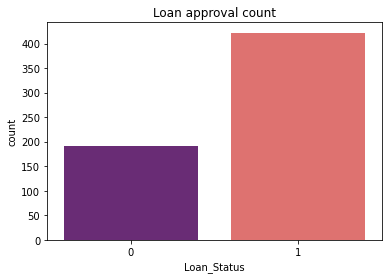

In [54]:
print(df1["Loan_Status"].value_counts())
sns.countplot(x='Loan_Status',data = df1,palette="magma")
plt.title("Loan approval count")

Here Yes(Y) denotes 1 having 422 values and No(N) denotes 0 having 192 values.

It clearly shows that Y has more than 50% of the values as comapared to N. Hence it can make our Machine Learning model bias to only side of the values.

To overcome this problem, we will use sampling technique in our further steps.

# Splitting into X and Y

In [55]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

In [56]:
#Imprting the libarires for sampling
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smk=SMOTE()
x_new,y_new=smk.fit_resample(x,y)

In [57]:
x=x_new
y=y_new

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

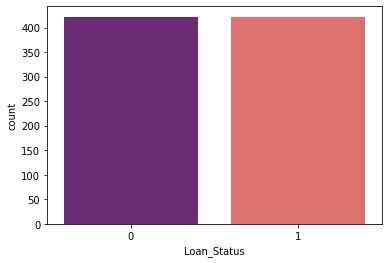

In [58]:
#Checking the distribution in the target column after sampling technique
sns.countplot(y,palette="magma")

Target column is balanced now.

We will now use our Machine learning model to train on the dataset.

# Machine Learning Model Training

In [59]:
#Choosing the best random state for our ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random State ",maxRS)

Best Accuracy is  0.8149606299212598  on Random State  9


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train))
X_test=pd.DataFrame(sc.transform(x_test))

## Saving the best random state and splitting the dataset into training and testing

In [61]:
#Splitting the dataset into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)

## Creating the Machine Learning model

#### As it is classification type of problem, we will use classification type of Machine learning models here

In [62]:
#taking the Logistic regression model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8149606299212598
[[ 92  29]
 [ 18 115]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       121
           1       0.80      0.86      0.83       133

    accuracy                           0.81       254
   macro avg       0.82      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



In [63]:
#Taking the Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.84251968503937
[[ 94  27]
 [ 13 120]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       121
           1       0.82      0.90      0.86       133

    accuracy                           0.84       254
   macro avg       0.85      0.84      0.84       254
weighted avg       0.85      0.84      0.84       254



In [64]:
#Taking the Decicision Tree classififer model

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8110236220472441
[[ 99  22]
 [ 26 107]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       121
           1       0.83      0.80      0.82       133

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [65]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.6653543307086615
[[84 37]
 [48 85]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       121
           1       0.70      0.64      0.67       133

    accuracy                           0.67       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.67      0.67      0.67       254



We can observe from above observation from all the machine learning model that Random Forest Classifier is giving us the best Accuracy score of 84% as compared to other models.

But this might be due to overfitting or underfitting of the dataset in the model. So, for confirmation we will validate all the ML models with the Cross validation score of the all the models.

# Cross - Validation Score

In [66]:
#Checking the cross validation score of Logistic Regresssor model
from sklearn.model_selection import cross_val_score

cvr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression Model: ",cvr.mean())

Cross Validation score of Logistic Regression Model:  0.7488517892364046


In [67]:
#Checking the cross validation score of Random Forest Classifier model

cvr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Forest Classifier Model: ",cvr.mean())

Cross Validation score of Forest Classifier Model:  0.823555931248239


In [68]:
#Checking the cross validation score of Decision Tree classifier model

cvr=cross_val_score(dtc,x,y,cv=5)
print("Cross Validation score of Decision Tree Classifier Model: ",cvr.mean())

Cross Validation score of Decision Tree Classifier Model:  0.7547689489997182


In [69]:
#Checking the cross validation score of KNeighbors Classifier model

cvr=cross_val_score(kn,x,y,cv=5)
print("Cross Validation score of KNeighbors Classifier Model: ",cvr.mean())

Cross Validation score of KNeighbors Classifier Model:  0.6220484643561567


Comparing the Scores of the respective Machine lwarning models and cross validation scores, we came to the conclusion as Random Forest Classifier is the best MAchine Learning model as it has the least diffrence between the respective scores. Randomforest classifier is giving the accuracy of 84%.

# Hyper Paramter tuning

In [70]:
#Importing the GridSearchCV library

from sklearn.model_selection import GridSearchCV

parameters={"criterion":("gini","entropy"), 
            "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}

In [71]:
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [72]:
best_mod=RandomForestClassifier(criterion='gini',max_depth=10)

best_mod.fit(x_train,y_train)
pred=best_mod.predict(x_test)
print("Best Accuracy Score: ",accuracy_score(y_test,pred)*100)

Best Accuracy Score:  83.07086614173228


# AUC_SCORE

In [73]:
#import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_prob=rf.predict_proba(x_test)[:,1]
print(y_pred_prob)

[0.77 0.89 0.07 0.78 0.66 0.7  0.06 0.54 0.04 0.13 0.44 0.12 0.5  0.06
 0.06 0.67 0.01 0.08 0.56 0.9  0.79 0.61 0.91 0.63 0.6  0.   0.82 0.04
 0.13 0.94 0.94 0.76 0.54 0.82 0.59 0.88 0.61 0.32 0.79 0.77 0.81 0.57
 0.16 0.48 0.41 0.28 0.22 0.04 0.46 0.83 0.8  0.8  0.09 0.66 0.66 0.07
 0.6  0.59 0.9  0.83 0.35 0.88 0.76 0.29 0.02 0.87 0.11 0.64 0.68 0.3
 0.8  0.75 0.87 0.   0.   0.17 0.33 0.96 0.87 0.65 0.89 0.65 0.01 0.17
 0.78 0.77 0.   0.14 0.85 0.35 0.89 0.54 0.08 0.79 0.85 0.47 0.75 0.75
 0.01 0.99 0.16 0.05 0.67 0.1  0.89 0.22 0.11 0.   0.54 0.62 0.89 0.25
 0.05 0.84 0.53 0.47 0.02 0.05 0.9  0.73 0.94 0.84 0.16 0.79 0.84 0.96
 0.11 0.87 0.94 0.04 0.9  0.99 0.59 0.84 0.76 0.59 0.81 0.16 0.36 0.78
 0.   0.15 0.97 0.59 0.67 0.71 0.02 0.72 0.78 0.03 0.11 0.78 0.65 0.16
 0.79 0.69 0.74 0.83 0.56 0.02 0.98 0.82 0.73 0.03 0.58 0.54 0.82 0.03
 0.7  0.01 0.79 0.78 0.84 0.82 0.82 0.04 0.18 0.74 0.64 0.9  0.72 0.56
 0.51 0.11 0.05 0.96 0.09 0.05 0.82 0.   0.54 0.59 0.33 0.68 0.56 0.04
 0.01 0

In [74]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

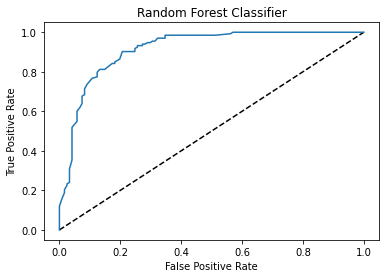

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logisitic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [76]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [77]:
print("AUC Score : ",auc_score)

AUC Score :  0.8395575716149879


# Saving the Model

In [78]:
import joblib
joblib.dump(best_mod,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

In [79]:
#Checking if the model is working
model=joblib.load("Loan Application Status Prediction.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

83.07086614173228


The accuracy score around 83% is very accuracy that is considerable but can be increase more, if more data featuring technique applied.